In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [5]:
## Traformar em binário (dependency)
def transformar_dependente(x):
    try:
        x = float(x)
        if x <= 0.5: # menos q 0.5 considerado nao, maior é sim
            return 0
        else:
            return 1
    except:
        if x == "no":
            return 0
        elif x == "yes":
            return 1
        else:
            return np.nan
        
train['dep_binario'] = train['dependency'].map(transformar_dependente)
test['dep_binario'] = test['dependency'].map(transformar_dependente)

In [58]:
train['dep_binario'].head(20)

0     0
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
Name: dep_binario, dtype: int64

In [63]:
train['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [6]:
## Traformar o yes e no em binário (edjefa e edjefe)
def transformar_edjef(x):
    if x == "no":
        return 0
    elif x == "yes":
        return 1
    return x
        
train['edjefa_binario'] = train['edjefa'].map(transformar_edjef)
test['edjefa_binario'] = test['edjefa'].map(transformar_edjef)

train['edjefe_binario'] = train['edjefe'].map(transformar_edjef)
test['edjefe_binario'] = test['edjefe'].map(transformar_edjef)

In [7]:
train['edjefe_binario'].value_counts()

0     3762
6     1845
11     751
9      486
3      307
15     285
8      257
7      234
5      222
14     208
17     202
2      194
4      137
16     134
1      123
12     113
10     111
13     103
21      43
18      19
19      14
20       7
Name: edjefe_binario, dtype: int64

In [64]:
# verifica se tem dados nulos

print(train[['Id', 'rooms', 'escolari', 'dep_binario','meaneduc', 'Target']].isnull().sum())


Id             0
rooms          0
escolari       0
dep_binario    0
meaneduc       0
Target         0
dtype: int64


In [9]:
# TRATANDO OS VALORES

In [68]:
train['idhogar'].value_counts()

fd8a6d014    13
ae6cf0558    12
0c7436de6    12
b7a0b59d7    11
4476ccd4c    11
             ..
9f6b2b309     1
75226a178     1
1637ac45b     1
0194d569d     1
21eb7fcc1     1
Name: idhogar, Length: 2988, dtype: int64

In [10]:
# resolver: calculamos o tamanho do domicilio com o numero de membros da familia
# pessoas no mesmo domicilio teriam o mesmo valor
train['tamanho_familia'] = train.groupby('idhogar')['idhogar'].transform('count')
test['tamanho_familia'] = test.groupby('idhogar')['idhogar'].transform('count')

In [11]:
train['meaneduc'].fillna(-1, inplace=True)
test['meaneduc'].fillna(-1, inplace=True)

In [12]:
train['v2a1'] = train['v2a1'].fillna(0)
test['v2a1'] = test['v2a1'].fillna(0)

In [13]:
mean_SQBmeaned = train['SQBmeaned'].mean()
train['SQBmeaned'].fillna(mean_SQBmeaned, inplace=True)
test['SQBmeaned'].fillna(mean_SQBmeaned, inplace=True)

In [14]:
train['rez_esc'].fillna(0, inplace=True)
test['rez_esc'].fillna(0, inplace=True)

In [15]:
train['v18q1'].fillna(0, inplace=True)
test['v18q1'].fillna(0, inplace=True)

In [70]:
#Describe ajudar a verificar se há valores extremos ou inconsistentes nas estatísticas de cada coluna.

print(train[['Id', 'rooms', 'escolari', 'dep_binario','meaneduc', 'Target', 'v2a1']].describe())


             rooms     escolari  dep_binario     meaneduc       Target  \
count  9557.000000  9557.000000  9557.000000  9557.000000  9557.000000   
mean      4.955530     7.200272     0.549754     9.226170     3.302292   
std       1.468381     4.730877     0.497544     4.173167     1.009565   
min       1.000000     0.000000     0.000000    -1.000000     1.000000   
25%       4.000000     4.000000     0.000000     6.000000     3.000000   
50%       5.000000     6.000000     1.000000     9.000000     4.000000   
75%       6.000000    11.000000     1.000000    11.500000     4.000000   
max      11.000000    21.000000     1.000000    37.000000     4.000000   

               v2a1  
count  9.557000e+03  
mean   4.662861e+04  
std    1.091671e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    4.500000e+04  
max    2.353477e+06  


In [17]:
# verifica nulos, tudo certo :)
print(train.isnull().sum().sort_values(ascending=False))

Id                 0
instlevel7         0
parentesco12       0
idhogar            0
hogar_nin          0
                  ..
sanitario1         0
sanitario2         0
sanitario3         0
sanitario5         0
tamanho_familia    0
Length: 147, dtype: int64


In [18]:
train['v2a1'].head()

0    190000.0
1    135000.0
2         0.0
3    180000.0
4    180000.0
Name: v2a1, dtype: float64

In [19]:
## EDA

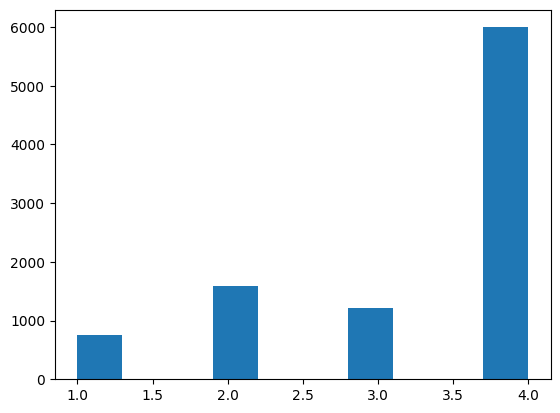

In [20]:
plt.hist(train['Target'])
plt.show()

<AxesSubplot: xlabel='Target', ylabel='count'>

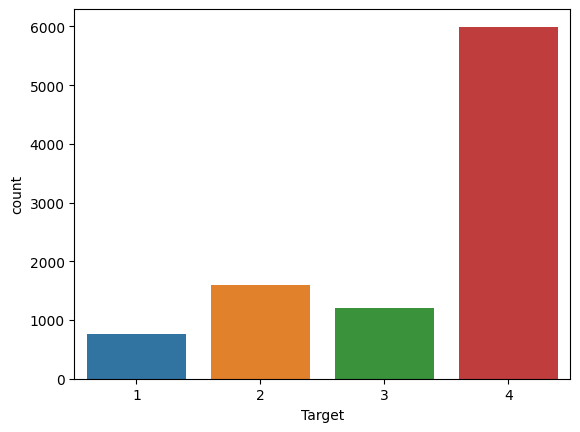

In [21]:
import seaborn as sns

sns.countplot(x='Target', data=train)


<AxesSubplot: >

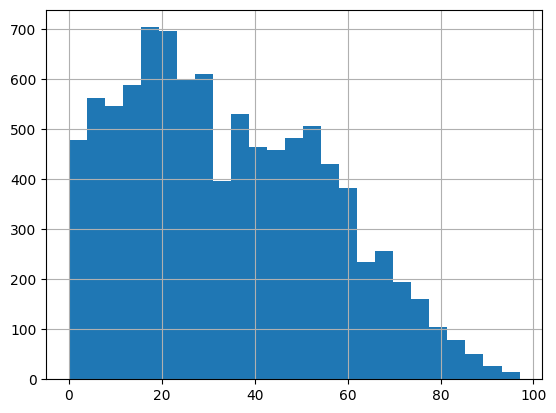

In [22]:
train['age'].hist(bins=25)
# Pico entre 15 e 25 anos, a partir disso tem uma queda gradual
# Nossa amostra entao pode ser composta principalmente por famílias com crianças e jovens adultos.

<AxesSubplot: xlabel='Target', ylabel='count'>

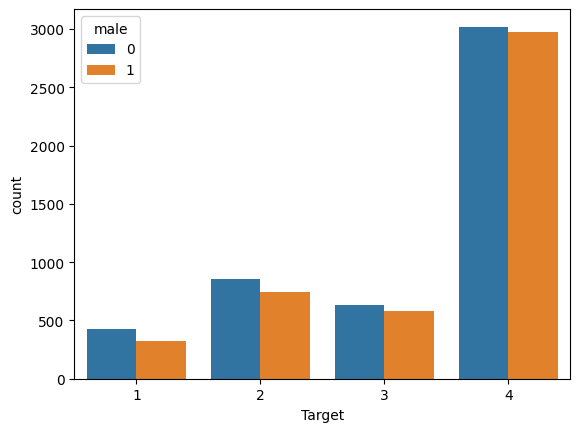

In [23]:
import seaborn as sns

sns.countplot(x='Target', hue='male', data=train)


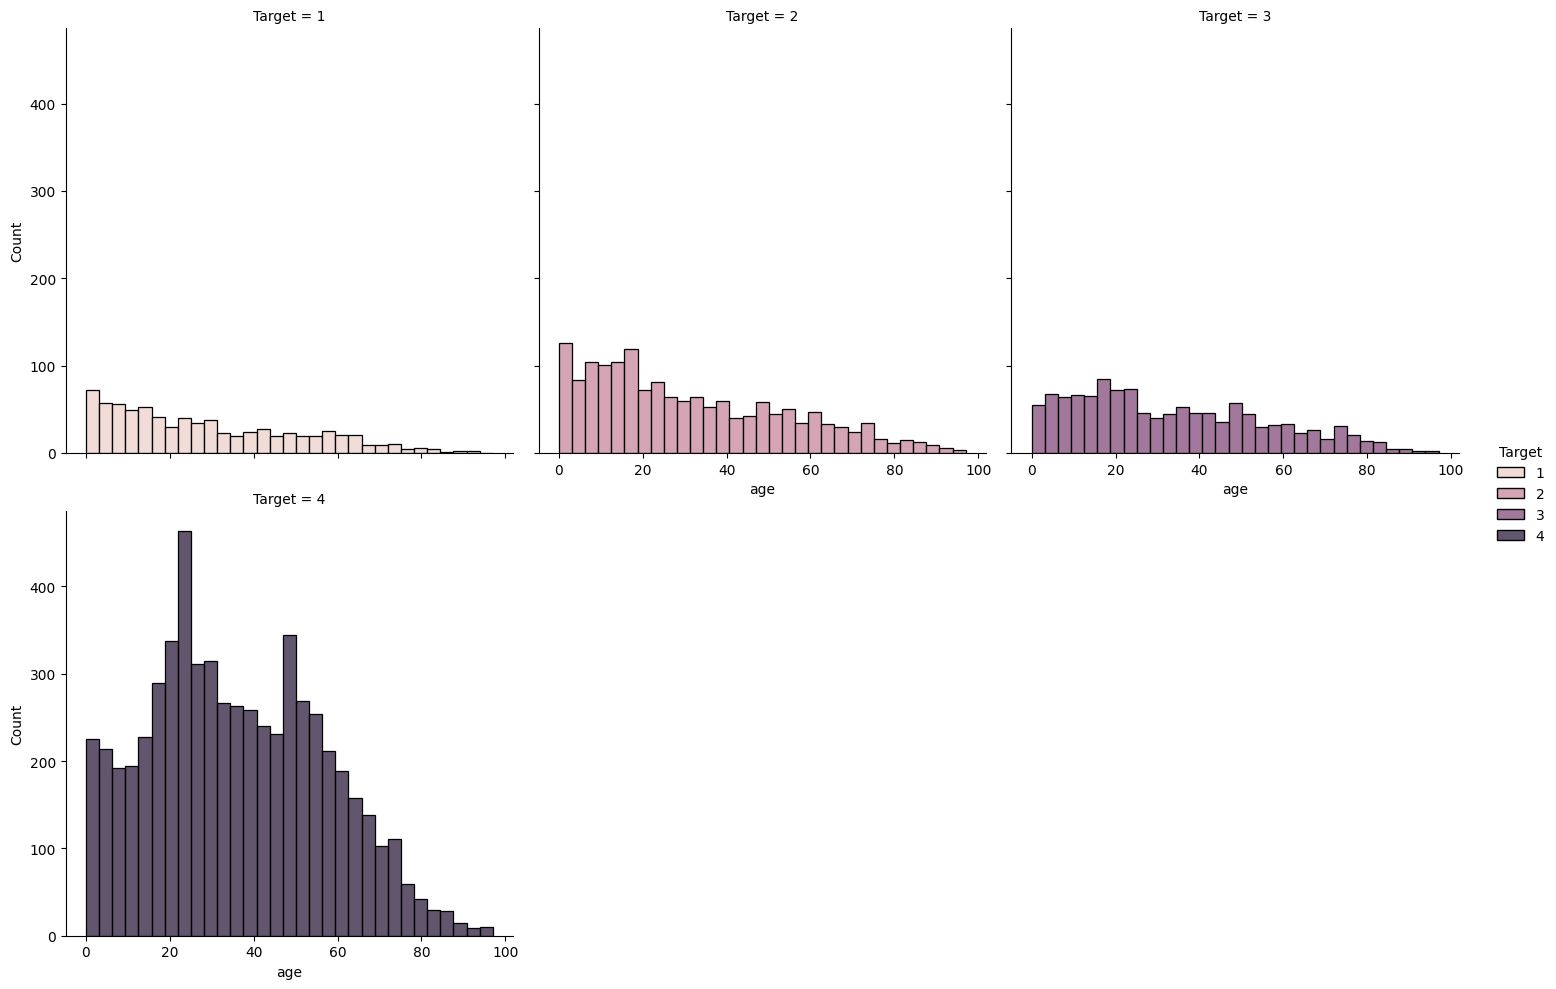

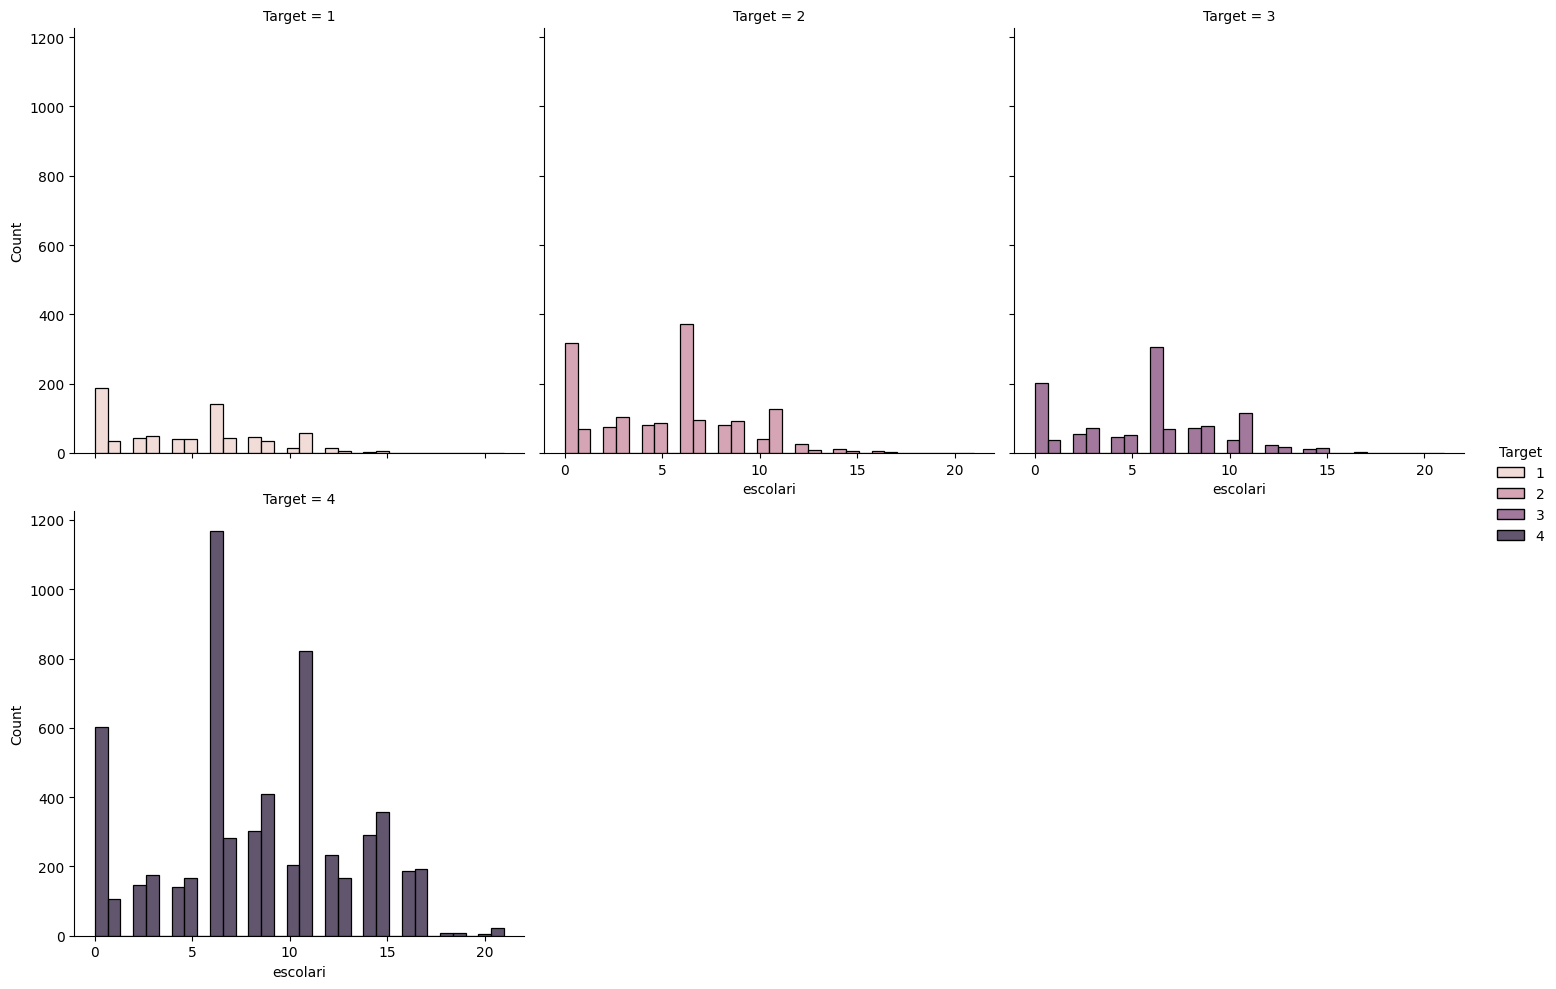

In [24]:
sns.displot(train, x='age', hue='Target', multiple='stack', col='Target', col_wrap=3)
plt.show()

# Distribuição da variável alvo por escolaridade
sns.displot(train, x='escolari', hue='Target', multiple='stack', col='Target', col_wrap=3)
plt.show()

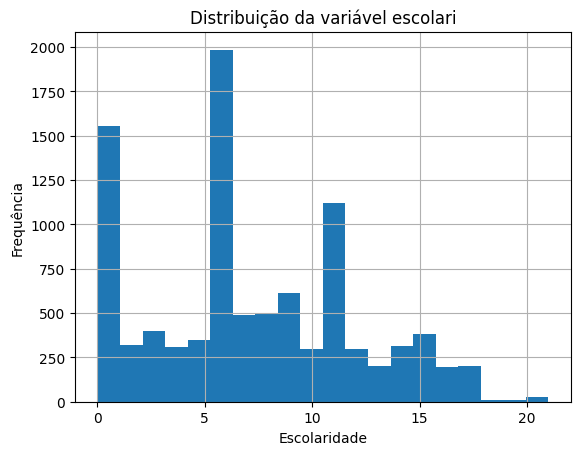

In [25]:
# criar um histograma para a variável "escolari"
train["escolari"].hist(bins=20)
plt.title("Distribuição da variável escolari")
plt.xlabel("Escolaridade")
plt.ylabel("Frequência")
plt.show()


/tmp/ipykernel_30633/1577912634.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


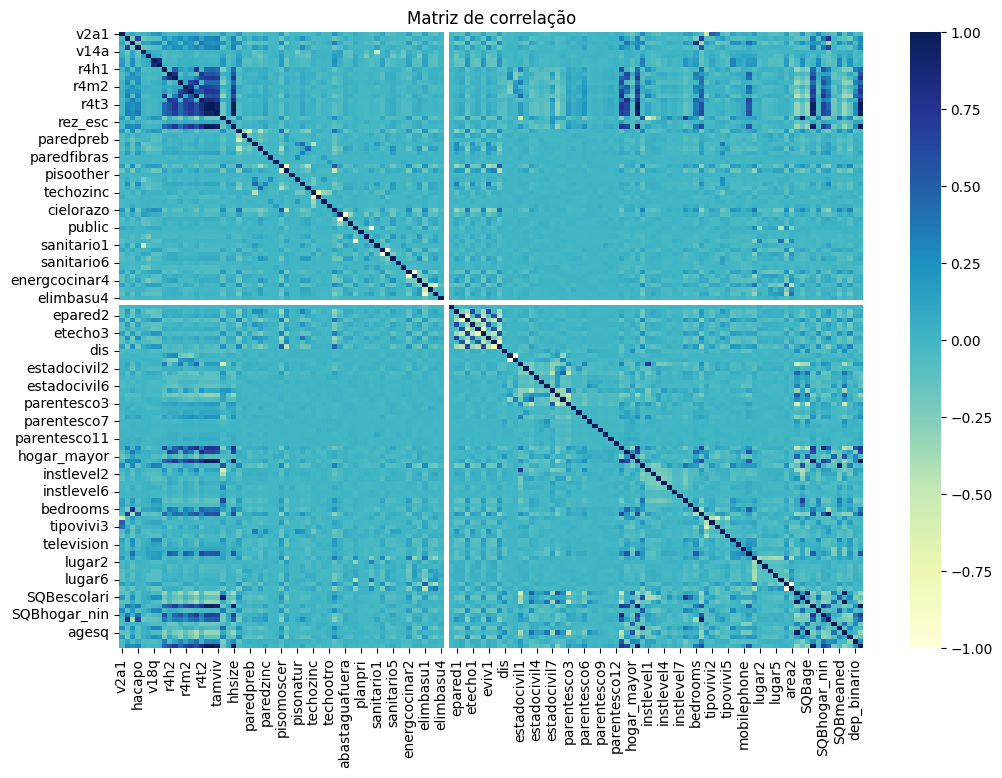

In [26]:
# criar uma matriz de correlação para todas as variáveis
corr_matrix = train.corr()

# plotar a matriz de correlação usando um mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.title("Matriz de correlação")
plt.show()


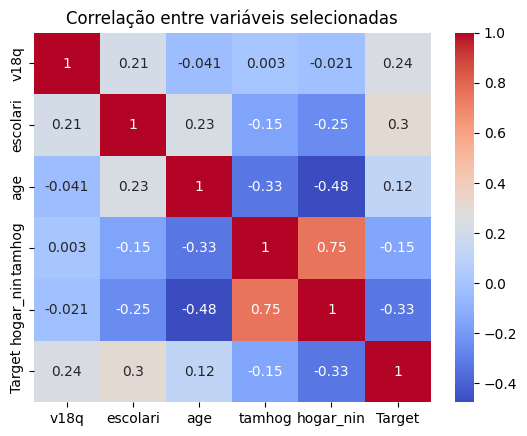

In [27]:
subset = ['v18q', 'escolari', 'age', 'tamhog', 'hogar_nin', 'Target']
corr_matrix = train[subset].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis selecionadas')
plt.show()


In [28]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,dep_binario,edjefa_binario,edjefe_binario,tamanho_familia
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,0,1.000000,0.0,100.0,1849,4,0,0,10,1
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,0,1.000000,64.0,144.0,4489,4,1,0,12,1
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,0,0.250000,64.0,121.0,8464,4,1,11,0,1
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,4,1.777778,1.0,121.0,289,4,1,0,11,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,4,1.777778,1.0,121.0,1369,4,1,0,11,4


In [29]:
# 4 classe/grupo
# 1 = extreme poverty
# 2 = moderate poverty
# 3 = vulnerable households
# 4 = non vulnerable households
   # sem as obvias reduntantes**:
variaveis = ['tamanho_familia', 'hogar_adul', 'hogar_mayor', 'hogar_total',
        'dep_binario', 'edjefe_binario', 'edjefa_binario', 'meaneduc', 'instlevel1', 'instlevel2',
        'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8',
        'instlevel9', 'bedrooms', 'overcrowding', 'tipovivi1', 'tipovivi2', 'tipovivi3',
        'tipovivi4', 'tipovivi5', 'computer', 'television', 'mobilephone', 'qmobilephone',
        'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'age',
        'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding',
        'SQBdependency', 'SQBmeaned', 'agesq']

# X sendo os dados de treino com apenas as variaveis selecionadas
# y sendo os resultados/classificacao de cada linha/familia
X = train[variaveis]
y = train['Target']

In [30]:
X.head()

,tamanho_familia,hogar_adul,hogar_mayor,hogar_total,dep_binario,edjefe_binario,edjefa_binario,meaneduc,instlevel1,instlevel2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,1,1,0,1,0,10,0,10.0,0,0,...,43,100,1849,1,100,0,1.000000,0.0,100.0,1849
1,1,1,1,1,1,12,0,12.0,0,0,...,67,144,4489,1,144,0,1.000000,64.0,144.0,4489
2,1,1,1,1,1,0,11,11.0,0,0,...,92,121,8464,1,0,0,0.250000,64.0,121.0,8464
3,4,2,0,4,1,11,0,11.0,0,0,...,17,81,289,16,121,4,1.777778,1.0,121.0,289
4,4,2,0,4,1,11,0,11.0,0,0,...,37,121,1369,16,121,4,1.777778,1.0,121.0,1369


In [31]:
# DIVISAO DE TREINO E VALIDACAO

In [32]:
#np.random.seed(0)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.3,random_state=0)

In [33]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((6689, 46), (2868, 46), (6689,), (2868,))

In [34]:
X_treino.head()

,tamanho_familia,hogar_adul,hogar_mayor,hogar_total,dep_binario,edjefe_binario,edjefa_binario,meaneduc,instlevel1,instlevel2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
6404,2,2,0,2,0,8,0,7.5,0,0,...,49,49,2401,4,64,0,4.000000,0.0000,56.25,2401
5002,5,2,0,5,1,6,0,6.0,0,0,...,45,36,2025,25,36,9,6.250000,2.2500,36.00,2025
7361,2,2,2,2,1,1,0,4.0,0,1,...,76,1,5776,4,1,0,0.250000,64.0000,16.00,5776
7447,5,4,0,5,0,0,0,3.5,1,0,...,47,0,2209,25,0,1,2.777778,0.0625,12.25,2209
5375,4,2,0,4,1,12,0,14.5,0,1,...,11,16,121,16,144,4,1.777778,1.0000,210.25,121


In [35]:
# ESCOLHA 1 = Regressão Logística por ser mais simples :D
#   - modelo linear que usa uma função logística para realizar a classificacao multiclasse


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
modelo = LogisticRegression(solver='saga', max_iter=20000) # instancia do modelo

In [38]:
modelo.fit(X_treino, y_treino)

LogisticRegression(max_iter=20000, solver='saga')

In [39]:
X.loc[X.isin(['995abe2fa']).any(axis=1)]

,tamanho_familia,hogar_adul,hogar_mayor,hogar_total,dep_binario,edjefe_binario,edjefa_binario,meaneduc,instlevel1,instlevel2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq


In [40]:
# predicao dos dados de validacao utilizando o modelo treinado
y_pred = modelo.predict(X_valid)

In [41]:
# cálculo do f1 score macro
f1_macro = f1_score(y_valid, y_pred, average='macro')
print('F1 score macro:', f1_macro)

F1 score macro: 0.28645788297394376


In [42]:
# resultado da previsão
print(y_pred)

[4 4 4 ... 4 4 4]


In [43]:
    # FINAL COM O TEST.CSV


In [44]:
of_teste = test[variaveis]

In [45]:
p_final = modelo.predict(of_teste)

In [46]:
sub = pd.Series(p_final, index=test['Id'], name='Target')
sub.shape

(23856,)

In [47]:
sub.to_csv('subRegressao.csv', header=True)

In [48]:
!head -n10 subRegressao.csv

Id,Target
ID_2f6873615,4
ID_1c78846d2,4
ID_e5442cf6a,4
ID_a8db26a79,4
ID_a62966799,4
ID_e77d38d45,4
ID_3c5f4bd51,4
ID_a849c29bd,4
ID_472fa82da,4


In [50]:
from sklearn.model_selection import KFold

def cross_val_score_model(model, X, y, n_splits=5):
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred, average='macro')
        scores.append(score)
    return np.mean(scores), np.std(scores)

mean_score, std_score = cross_val_score_model(modelo, X, y, n_splits=5)
print(f"Mean F1 Score: {mean_score:.2f}, Std: {std_score:.2f}")


Mean F1 Score: 0.29, Std: 0.01
